# Explore MIDI data

## install the data

In [7]:
import os

dir_path = "../midis"
count = 0

for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1

print(f"number of tracks: {count}")

number of tracks: 10854


In [8]:
!pip3 install mido

338.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Average length of a file in the dataset: 406.33724054304435


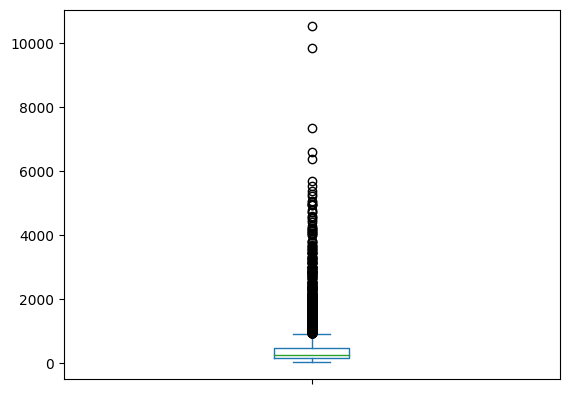

In [9]:
from mido import MidiFile
import pandas as pd

midis_length = []

for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        mid = MidiFile(os.path.join(dir_path, path))
        midis_length.append(mid.length)

print(f"Average length of a file in the dataset: {sum(midis_length) / len(midis_length)}")

# Show the distribution of the length of the files
df_length = pd.Series(midis_length)
box_plot = df_length.plot.box()

In [10]:
!pip3 install music21

2361.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [11]:
from music21 import converter

track = converter.parseFile(os.path.join(dir_path, os.listdir(dir_path)[1]))
track

<music21.stream.Score 0x147b67550>

In [12]:
timeSignature = track.getTimeSignatures()[0]
music_analysis = track.analyze('key')
print("Music time signature: {0}/{1}".format(timeSignature.beatCount, timeSignature.denominator))
print("Expected music key: {0}".format(music_analysis))
print("Music key confidence: {0}".format(music_analysis.correlationCoefficient))

Music time signature: 4/4
Expected music key: b- minor
Music key confidence: 0.5387538852772098


In [13]:
def get_notes_and_chords(midi):
    notes = []
    chords = []
    for element in midi.flat.notes:
        if element.isNote:
            notes.append(element)
        if element.isChord:
            chords.append(element)
            for chord_note in element.notes:
                chord_note.offset = element.offset
                notes.append(chord_note)
            #print(note.name, note.octave, note.duration.fullName, note.offset)
    return notes, chords

In [14]:
notes, chords = get_notes_and_chords(track)
i = 0
for note in notes:
    print("Note: {note}, octave: {octave}, duration: {duration}, offset: {offset}, velocity: {velocity}".format(note=note.name, octave=note.octave, duration=note.duration.quarterLength, offset=note.offset, velocity=note.volume.velocity))
    if i == 20:
        break
    i += 1


Note: B, octave: 2, duration: 0.5, offset: 12.0, velocity: 102
Note: E-, octave: 2, duration: 1.0, offset: 14.0, velocity: 82
Note: E-, octave: 3, duration: 1.0, offset: 14.0, velocity: 102
Note: D, octave: 5, duration: 1.5, offset: 14.0, velocity: 106
Note: C#, octave: 4, duration: 2/3, offset: 46/3, velocity: 109
Note: C, octave: 4, duration: 4/3, offset: 16.0, velocity: 98
Note: F, octave: 2, duration: 1.75, offset: 16.0, velocity: 95
Note: F, octave: 1, duration: 0.25, offset: 16.0, velocity: 82
Note: A, octave: 4, duration: 2/3, offset: 16.0, velocity: 81
Note: G#, octave: 5, duration: 0.25, offset: 16.5, velocity: 105
Note: A, octave: 3, duration: 2/3, offset: 17.25, velocity: 100
Note: F#, octave: 2, duration: 0.25, offset: 56/3, velocity: 108
Note: G, octave: 2, duration: 0.25, offset: 19.25, velocity: 102
Note: E, octave: 2, duration: 0.25, offset: 19.75, velocity: 102
Note: E, octave: 2, duration: 5/12, offset: 20.0, velocity: 102
Note: E-, octave: 2, duration: 1.0, offset: 6

In [15]:
help(notes[0])

Help on Note in module music21.note object:

class Note(NotRest)
 |  Note(pitch: 't.Union[str, int, Pitch, None]' = None, *, name: 't.Optional[str]' = None, nameWithOctave: 't.Optional[str]' = None, **keywords)
 |  
 |  One of the most important music21 classes, a Note
 |  stores a single note (that is, not a rest or an unpitched element)
 |  that can be represented by one or more notational units -- so
 |  for instance a C quarter-note and a D# eighth-tied-to-32nd are both
 |  a single Note object.
 |  
 |  
 |  A Note knows both its total duration and how to express itself as a set of
 |  tied notes of different lengths. For instance, a note of 2.5 quarters in
 |  length could be half tied to eighth or dotted quarter tied to quarter.
 |  
 |  
 |  The first argument to the Note is the pitch name (with or without
 |  octave, see the introduction to :class:`music21.pitch.Pitch`).
 |  Further arguments can be specified as keywords (such as type, dots, etc.)
 |  and are passed to the und

In [16]:
# I think chords should be just split into notes
i = 0
for chord in chords:
    print(chord.fullName, chord.offset)
    if i == 100:
        break
    i += 1

Chord {E-flat in octave 2 | E-flat in octave 3} 16th 14.0
Chord {E-flat in octave 2 | E-flat in octave 3 | B in octave 3 | E in octave 2} 16th 61/3
Chord {B in octave 3 | E-flat in octave 3} 16th 64/3
Chord {D in octave 3 | B-flat in octave 1} 16th 22.5
Chord {C-sharp in octave 4 | B-flat in octave 3} Dotted Eighth 22.5
Chord {E-flat in octave 1 | E-flat in octave 2} 16th 23.0
Chord {C in octave 4 | F in octave 2 | C-sharp in octave 4 | F in octave 1 | G-sharp in octave 4 | A in octave 3} 16th 23.5
Chord {D in octave 2 | D in octave 1} 16th 24.0
Chord {C-sharp in octave 2 | C-sharp in octave 1} 16th 24.5
Chord {E in octave 4 | F in octave 4 | C-sharp in octave 4} Half Triplet (1 1/3 QL) 24.5
Chord {C-sharp in octave 2 | C-sharp in octave 1} 16th 25.25
Chord {C-sharp in octave 1 | C-sharp in octave 2} 16th 77/3
Chord {C in octave 3 | C in octave 2} 16th 79/3
Chord {G in octave 3 | C-sharp in octave 4 | A in octave 1} 16th 29.0
Chord {A in octave 3 | A in octave 2} Quarter tied to 16th (

In [17]:
help(chords[0])

Help on Chord in module music21.chord object:

class Chord(ChordBase)
 |  Chord(notes: 't.Union[None, t.Sequence[pitch.Pitch], t.Sequence[note.Note], t.Sequence[str], str, t.Sequence[int]]' = None, **keywords)
 |  
 |  Class representing Chords.
 |  
 |  A Chord functions like a Note object but has multiple pitches.
 |  
 |  Create chords by passing a list of strings of pitch names:
 |  
 |  >>> dMaj = chord.Chord(['D', 'F#', 'A'])
 |  >>> dMaj
 |  <music21.chord.Chord D F# A>
 |  
 |  Pitch names can also include octaves:
 |  
 |  >>> dMaj = chord.Chord(['D3', 'F#4', 'A5'])
 |  >>> dMaj
 |  <music21.chord.Chord D3 F#4 A5>
 |  
 |  A single string with note names separated by spaces also works:
 |  
 |  >>> myChord = chord.Chord('A4 C#5 E5')
 |  >>> myChord
 |  <music21.chord.Chord A4 C#5 E5>
 |  
 |  
 |  Or you can combine already created Notes or Pitches:
 |  
 |  >>> cNote = note.Note('C')
 |  >>> eNote = note.Note('E')
 |  >>> gNote = note.Note('G')
 |  
 |  And then create a chor